In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogFormatterSciNotation

In [2]:
# 读取Cora数据集
data = pd.read_csv('./data/cora_cites.csv')

# 创建图
G = nx.from_pandas_edgelist(data, source='ID of cited paper', target='ID of citing paper')

# 计算度分布
degrees = [G.degree(n) for n in G.nodes()]
max_degree = max(degrees)
degree_count = np.bincount(degrees)
degrees_unique = np.arange(len(degree_count))

# 将度分布转化为概率分布
degree_probability = degree_count / degree_count.sum()

# 对概率进行对数变换，过滤掉概率为0的点
mask = degree_probability > 0
degrees_log = np.log10(degrees_unique[mask])
probability_log = np.log10(degree_probability[mask])


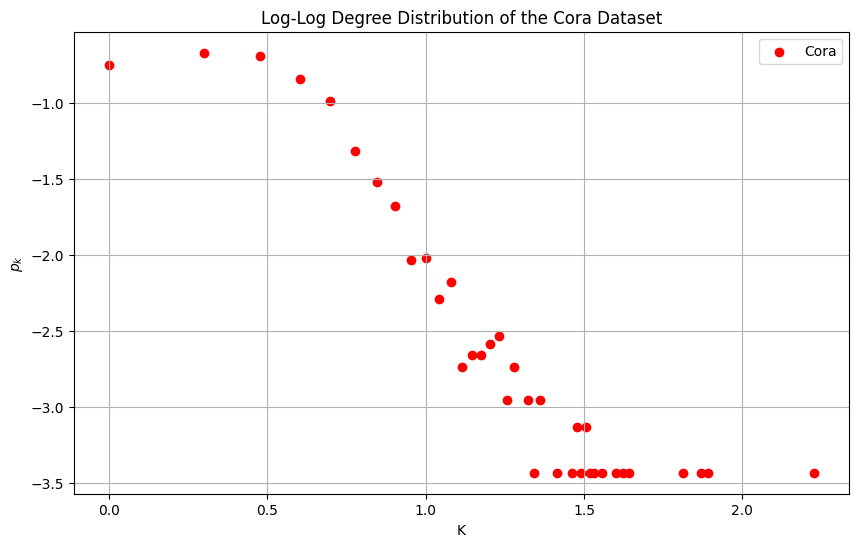

In [3]:
# 绘制度分布图
plt.figure(figsize=(10, 6))
plt.scatter(degrees_log, probability_log, color='r', label='Cora')
plt.title('Log-Log Degree Distribution of the Cora Dataset')
plt.xlabel('K')
plt.ylabel('$p_k$')
plt.grid(True)
plt.legend()
plt.show()

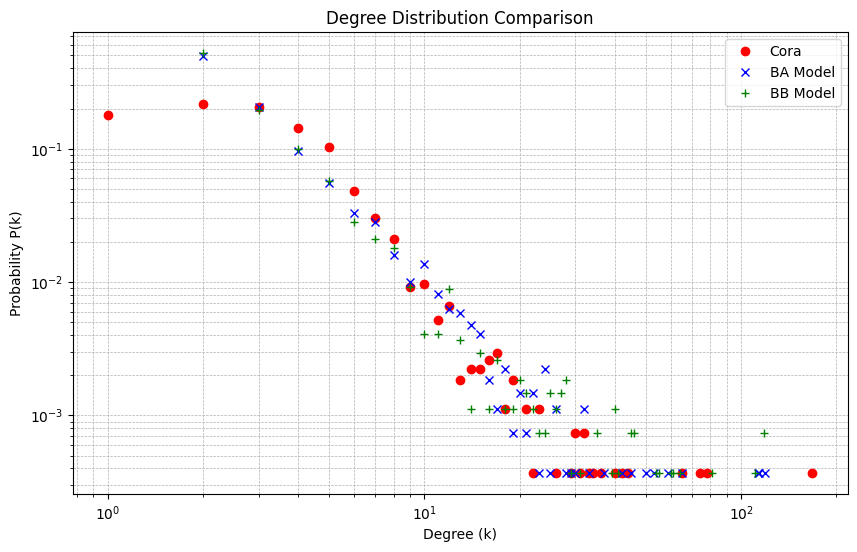

In [26]:
# 读取Cora数据集
data = pd.read_csv('./data/cora_cites.csv')
G_cora = nx.from_pandas_edgelist(data, source='ID of cited paper', target='ID of citing paper')

# BA模型
G_ba = nx.barabasi_albert_graph(n=len(G_cora.nodes()), m=2)  # 假设平均每个节点连接2个其他节点

# BB模型
def bianconi_barabasi_model(N, m, fitness):
    """Generate a network based on the Bianconi-Barabasi model."""
    G = nx.complete_graph(m)
    for i in range(m):
        G.nodes[i]['fitness'] = fitness[i]

    for new_node in range(m, N):
        probs = np.array([G.degree(node) * G.nodes[node]['fitness'] for node in G.nodes()])
        probs /= probs.sum()
        targets = np.random.choice(G.nodes(), size=m, replace=False, p=probs)
        G.add_node(new_node, fitness=fitness[new_node])
        G.add_edges_from([(new_node, target) for target in targets])

    return G

# Settings for the model
N = len(G_cora.nodes())  # Total number of nodes
m = 2    # Number of edges each new node will have
fitness = 0.5 + np.random.rand(N)  # Random fitness values between 0.5 and 1.5
G_bb = bianconi_barabasi_model(N, m, fitness)


# 计算度分布函数
def calculate_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    max_degree = max(degrees)
    degree_count = np.bincount(degrees)
    degree_probability = degree_count / degree_count.sum()
    return np.arange(len(degree_count)), degree_probability

degrees_cora, prob_cora = calculate_degree_distribution(G_cora)
degrees_ba, prob_ba = calculate_degree_distribution(G_ba)
degrees_bb, prob_bb = calculate_degree_distribution(G_bb)

# 绘图
plt.figure(figsize=(10, 6))
plt.loglog(degrees_cora, prob_cora, 'r', marker='o', linestyle='none', label='Cora')
plt.loglog(degrees_ba, prob_ba, 'b', marker='x', linestyle='none', label='BA Model')
plt.loglog(degrees_bb, prob_bb, 'g', marker='+', linestyle='none', label='BB Model')
plt.xlabel('Degree (k)')
plt.ylabel('Probability P(k)')
plt.title('Degree Distribution Comparison')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

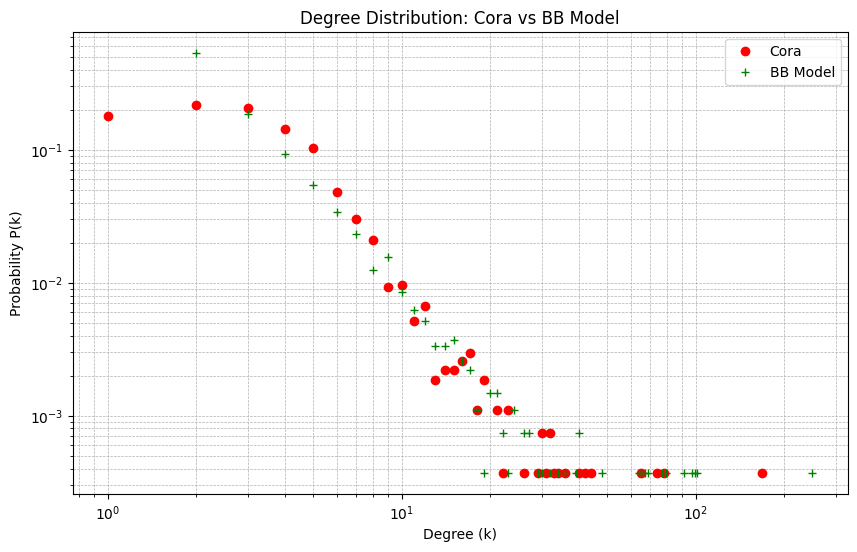

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 读取Cora数据集
data = pd.read_csv('./data/cora_cites.csv')
G_cora = nx.from_pandas_edgelist(data, source='ID of cited paper', target='ID of citing paper')

# BB模型
def bianconi_barabasi_model(N, m, fitness):
    """Generate a network based on the Bianconi-Barabasi model."""
    G = nx.complete_graph(m)
    for i in range(m):
        G.nodes[i]['fitness'] = fitness[i]

    for new_node in range(m, N):
        probs = np.array([G.degree(node) * G.nodes[node]['fitness'] for node in G.nodes()])
        probs /= probs.sum()
        targets = np.random.choice(G.nodes(), size=m, replace=False, p=probs)
        G.add_node(new_node, fitness=fitness[new_node])
        G.add_edges_from([(new_node, target) for target in targets])

    return G

# Settings for the model
N = len(G_cora.nodes())  # Total number of nodes
m = 2    # Number of edges each new node will have
fitness = 0.55 + np.random.rand(N)  # Random fitness values between 0.5 and 1.5
G_bb = bianconi_barabasi_model(N, m, fitness)

# 计算度分布函数
def calculate_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    max_degree = max(degrees)
    degree_count = np.bincount(degrees)
    degree_probability = degree_count / degree_count.sum()
    return np.arange(len(degree_count)), degree_probability

degrees_cora, prob_cora = calculate_degree_distribution(G_cora)
degrees_bb, prob_bb = calculate_degree_distribution(G_bb)

# # 绘图：Cora vs BB Model
plt.figure(figsize=(10, 6))
plt.loglog(degrees_cora, prob_cora, 'r', marker='o', linestyle='none', label='Cora')
plt.loglog(degrees_bb, prob_bb, 'g', marker='+', linestyle='none', label='BB Model')
plt.xlabel('Degree (k)')
plt.ylabel('Probability P(k)')
plt.title('Degree Distribution: Cora vs BB Model')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
